In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing


In [21]:
df = pd.read_csv("./Data/p2.csv", parse_dates=['Date'])
df = df.sort_values('Date')
df.set_index('Date', inplace=True)
df.head()


,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,34.29,34.29,33.20,33.52,3011402
2006-01-04,33.43,33.85,33.42,33.82,2608419
2006-01-05,33.82,34.20,33.73,33.86,1964803
2006-01-06,34.23,34.30,33.81,34.06,5064600
2006-01-09,34.00,34.74,33.99,34.71,6648959


In [22]:
sma_10 = df['Close'].ewm(span=10, adjust=False).mean()
sma_30 = df['Close'].ewm(span=30, adjust=False).mean()
close = df['Close']

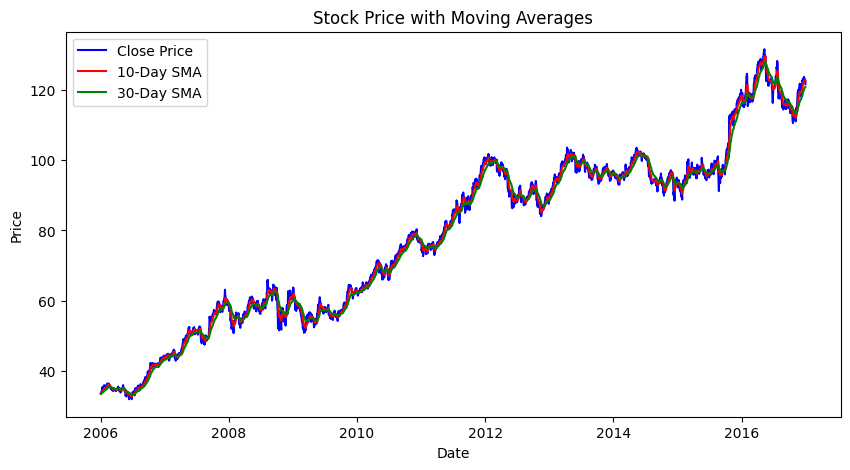

In [23]:
plt.figure(figsize=(10, 5))

plt.plot(close, color="blue", label="Close Price")
plt.plot(sma_10, color="red", label="10-Day SMA")
plt.plot(sma_30, color="green", label="30-Day SMA")

plt.title("Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(False)

plt.show()


In [24]:
ses_model = SimpleExpSmoothing(close, initialization_method="estimated")
ses_fit = ses_model.fit(smoothing_level=0.2, optimized=False)

ses = ses_fit.fittedvalues


D:\ML_College\NLP\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


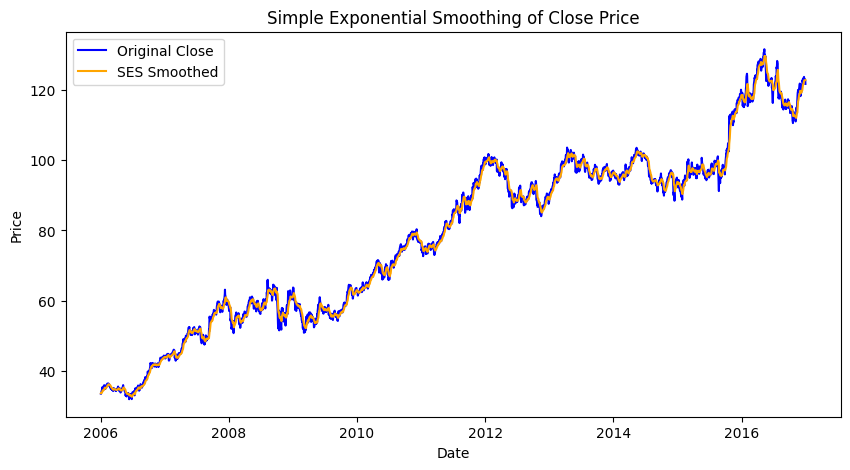

In [26]:
plt.figure(figsize=(10, 5))

plt.plot(close, color="blue", label="Original Close")
plt.plot(ses, color="orange", label="SES Smoothed")

plt.title("Simple Exponential Smoothing of Close Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(False)

plt.show()
